<a href="https://colab.research.google.com/github/mdElyess/projet-01-GI2-S2-2022-2023/blob/main/Project_Cats_vs_Dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import the libraries:**

In [1]:
!pip install --upgrade tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

**2. Define image properties:**

In [3]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/dogs-vs-cats

/content/drive/MyDrive/dogs-vs-cats


**3. Prepare dataset for training model:**

In [18]:
import os
import pandas as pd

filenames = os.listdir("./train")

categories = []
for f_name in filenames:
    category = f_name.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


##filenames=os.listdir("./dogs-vs-cats/train")

##categories=[]
##for f_name in filenames:
 ##   category=f_name.split('.')[0]
   ## if category=='dog':
    ##    categories.append(1)
    ##else:
      ##  categories.append(0)

##df=pd.DataFrame({
 ##   'filename':filenames,
  ##  'category':categories
##})

**4. Create the neural net model:**

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

Image_Width = 150
Image_Height = 150
Image_Channels = 3


model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

**5. Analyzing model:**

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 72, 72, 64)      

**6. Define callbacks and learning rate:**

In [21]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.01)
callbacks = [earlystop,learning_rate_reduction]

**7. Manage data:**

In [22]:
from sklearn.model_selection import train_test_split


In [11]:
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15



##df["category"] = df["category"].replace({0:'cat',1:'dog'})
##train_df,validate_df = train_test_split(df,test_size=0.20,
  ##random_state=42)

##train_df = train_df.reset_index(drop=True)
##validate_df = validate_df.reset_index(drop=True)

##total_train=train_df.shape[0]
##total_validate=validate_df.shape[0]
##batch_size=15

**8. Training and validation data generator:**

In [13]:
from keras.preprocessing.image import ImageDataGenerator


In [14]:
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
test_filenames = os.listdir("./test1")

test_categories = []
for f_name in test_filenames:
    category = f_name.split('.')[0]
    if category == 'dog':
        test_categories.append(1)
    else:
        test_categories.append(0)

test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': test_categories
})


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

train_df["category"] = train_df["category"].astype(str)
validate_df["category"] = validate_df["category"].astype(str)
test_df["category"] = test_df["category"].astype(str)


train_datagen = ImageDataGenerator(rotation_range=15,
                                   rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)


Image_Size = (150, 150)

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    "./train/",
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=Image_Size,
                                                    class_mode='categorical',
                                                    batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              "./train/",
                                                              x_col='filename',
                                                              y_col='category',
                                                              target_size=Image_Size,
                                                              class_mode='categorical',
                                                              batch_size=batch_size)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  "./test1/",
                                                  x_col='filename',
                                                  y_col='category',
                                                  target_size=Image_Size,
                                                  class_mode='categorical',
                                                  batch_size=batch_size)

Found 4862 validated image filenames belonging to 1 classes.
Found 1216 validated image filenames belonging to 1 classes.
Found 12500 validated image filenames belonging to 1 classes.


**9. Model Training:**

In [26]:
epochs=1
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

324/324 [==============================] - ETA: 0s - loss: 1.9904 - accuracy: 0.5048

324/324 [==============================] - 118s 318ms/step - loss: 1.9904 - accuracy: 0.5048 - val_loss: 1.5538 - val_accuracy: 0.9210 - lr: 0.0010


**10. Save the model:**

In [27]:
model.save("model1_catsVSdogs_10epoch.h5")

**11. Test data preparation:**

In [29]:
test_filenames = os.listdir("./test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

**12. Make categorical prediction:**

In [32]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

834/834 [==============================] - 260s 312ms/step


**13. Convert labels to categories:**

In [33]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

**14. Visualize the prediction results:**

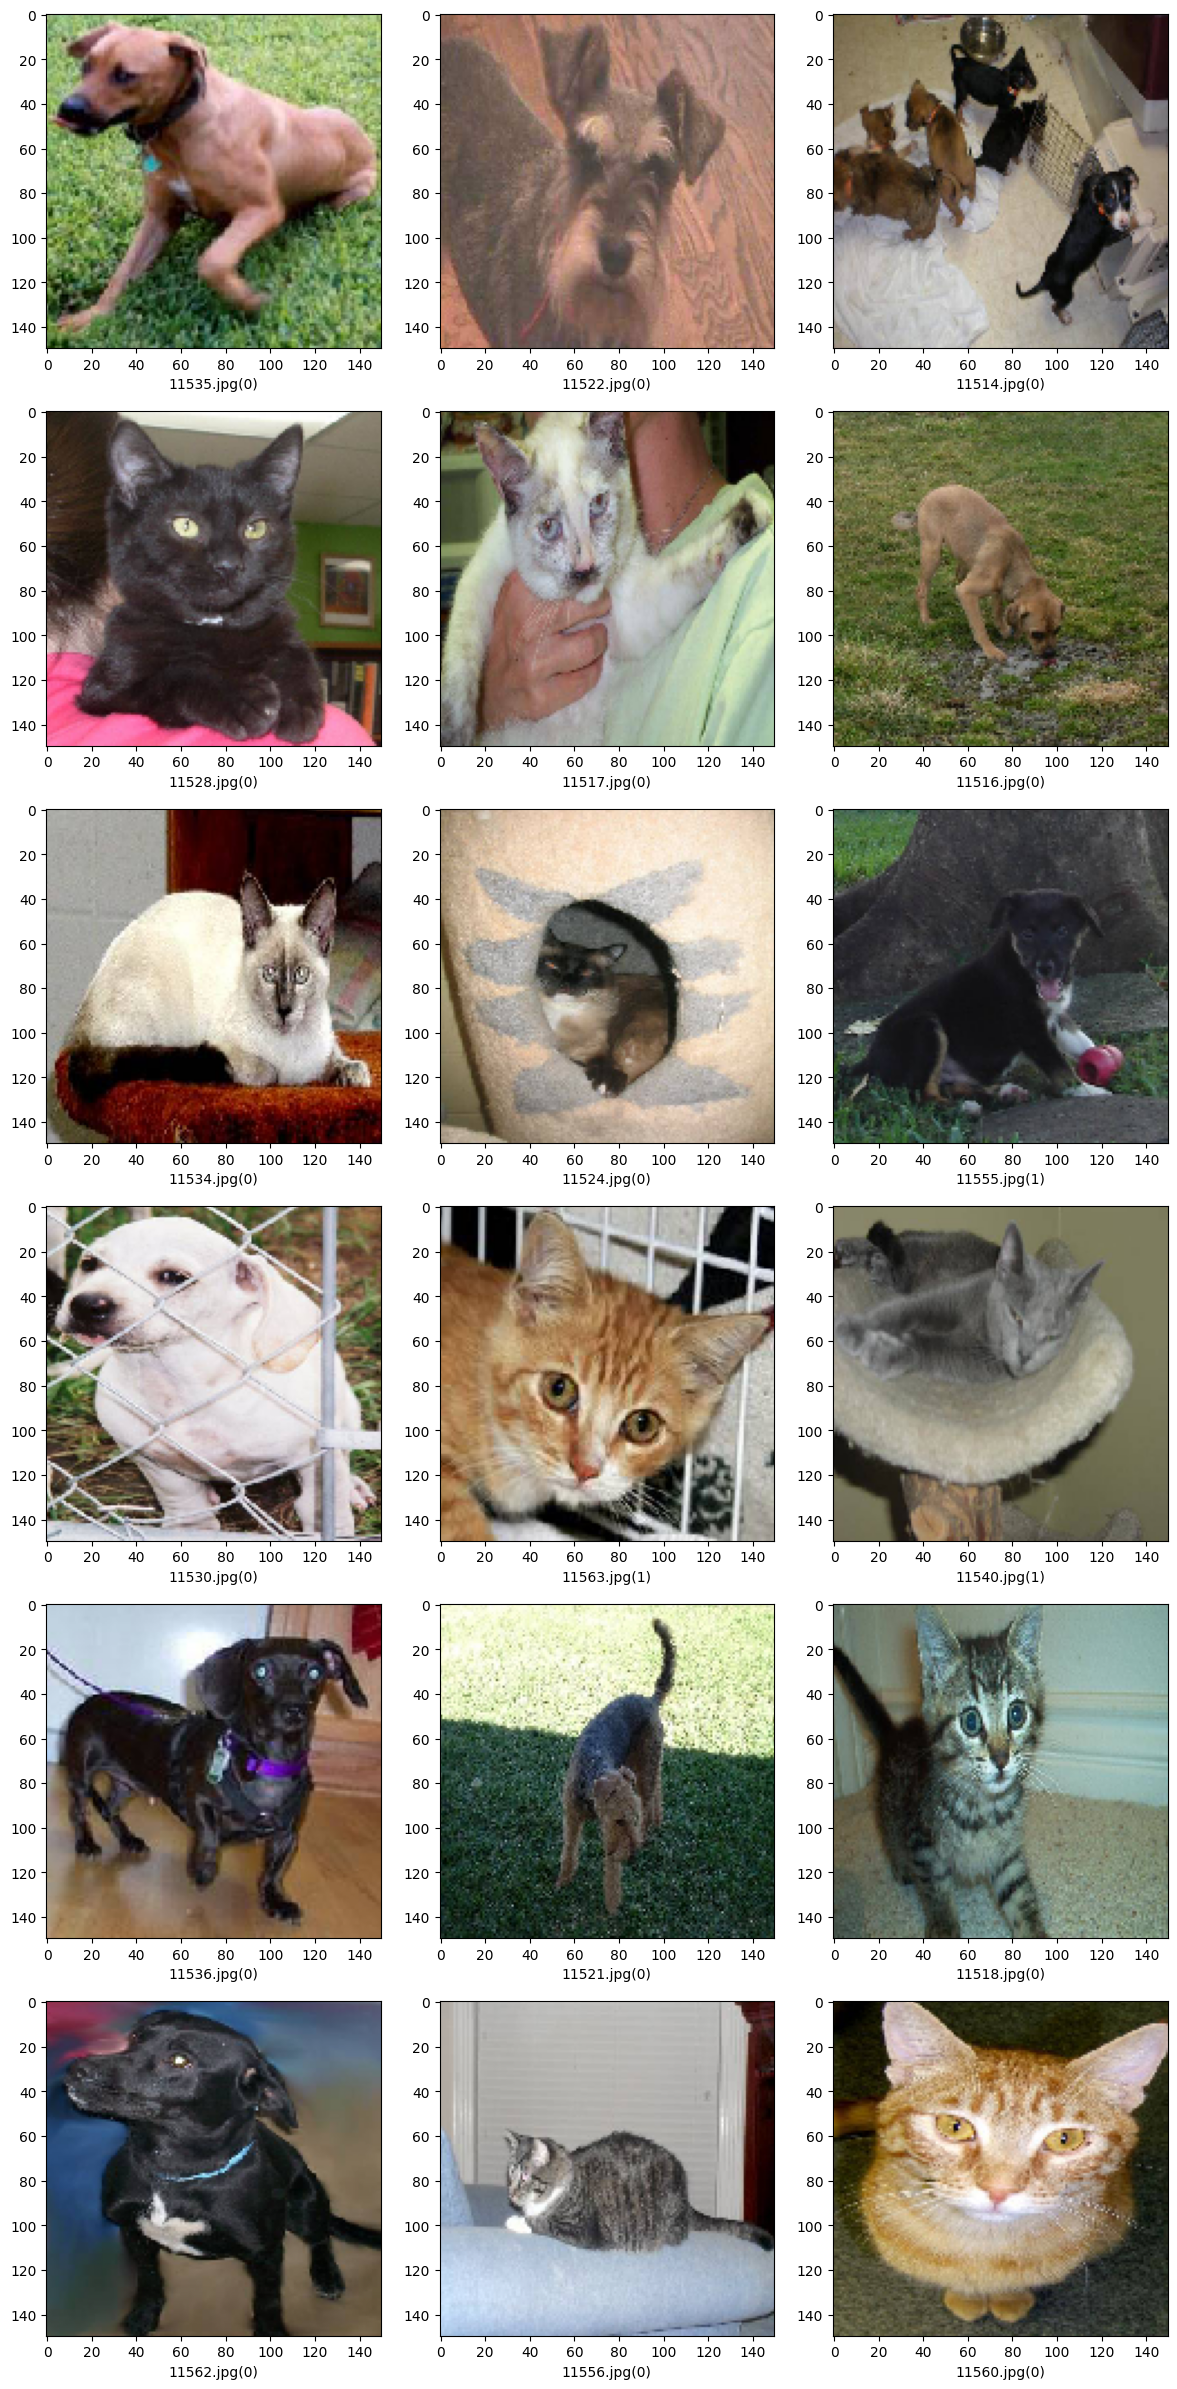

In [35]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

**15. Test your model performance on custom data:**

1/1 [==============================] - 0s 19ms/step


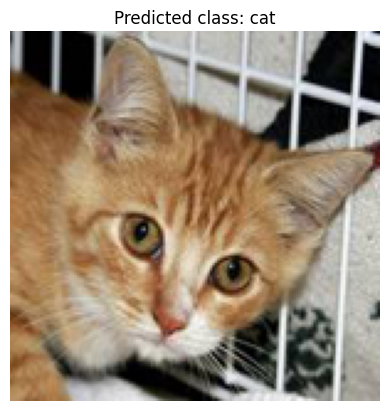

1/1 [==============================] - 0s 19ms/step


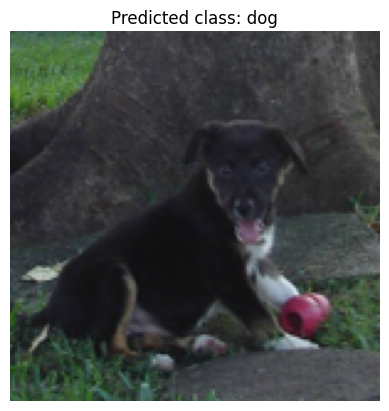

1/1 [==============================] - 0s 18ms/step


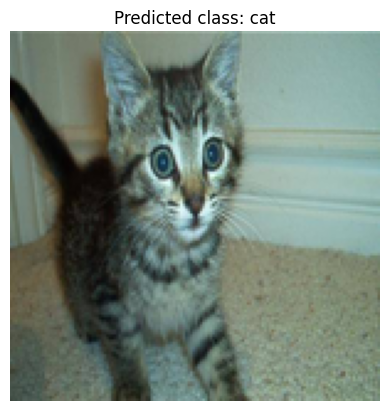

In [42]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np

for i in range(4):
  if i==1 :
    im = Image.open("./test1/11563.jpg")
    im = im.resize(Image_Size)
    im = np.expand_dims(im, axis=0)
    im = np.array(im) / 255

    pred_prob = model.predict(im)[0]
    pred_label = np.argmax(pred_prob)
    pred_class = results[pred_label]

    plt.imshow(np.squeeze(im))
    plt.title(f'Predicted class: {pred_class}')
    plt.axis('off')
    plt.show()
  if i==2 :
    im = Image.open("./test1/11555.jpg")
    im = im.resize(Image_Size)
    im = np.expand_dims(im, axis=0)
    im = np.array(im) / 255

    pred_prob = model.predict(im)[0]
    pred_label = np.argmax(pred_prob)
    pred_class = results[pred_label]

    plt.imshow(np.squeeze(im))
    plt.title(f'Predicted class: {pred_class}')
    plt.axis('off')
    plt.show()
  if i==3 :
    im = Image.open("./test1/11518.jpg")
    im = im.resize(Image_Size)
    im = np.expand_dims(im, axis=0)
    im = np.array(im) / 255

    pred_prob = model.predict(im)[0]
    pred_label = np.argmax(pred_prob)
    pred_class = results[pred_label]

    plt.imshow(np.squeeze(im))
    plt.title(f'Predicted class: {pred_class}')
    plt.axis('off')
    plt.show()